# Simulating a quantum circuit

In this tutorial, we demonstrate how to simulate a quantum circuit with the density matrix formalism. We start by importing the relevant object classes, including circuits, operations, states, and compilers, as well as standard dependencies. 


In [2]:
import graphiq
from graphiq.circuit.circuit_dag import CircuitDAG
from graphiq.circuit.ops import Hadamard, CNOT, MeasurementCNOTandReset
from graphiq.backends.density_matrix.compiler import DensityMatrixCompiler
from graphiq.backends.density_matrix.state import DensityMatrix
from graphiq.state import QuantumState

import networkx as nx
import matplotlib.pyplot as plt

Circuits are defined by the number of emitter, photon, and classical registers. Operations are added to the circuit sequentially, defining which register type and index it acts on.

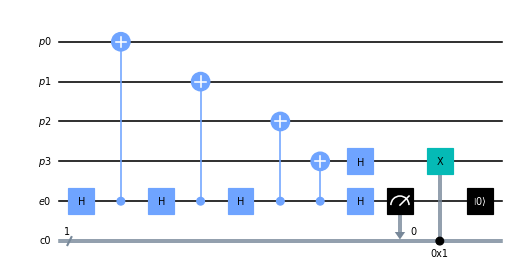

In [3]:
# build up the quantum circuit for a 4-qubit linear cluster state
circuit = CircuitDAG(n_emitter=1, n_photon=4, n_classical=1)

circuit.add(Hadamard(register=0, reg_type="e"))
circuit.add(CNOT(control=0, control_type="e", target=0, target_type="p"))
circuit.add(Hadamard(register=0, reg_type="e"))
circuit.add(CNOT(control=0, control_type="e", target=1, target_type="p"))
circuit.add(Hadamard(register=0, reg_type="e"))
circuit.add(CNOT(control=0, control_type="e", target=2, target_type="p"))
circuit.add(CNOT(control=0, control_type="e", target=3, target_type="p"))

circuit.add(Hadamard(register=3, reg_type="p"))
circuit.add(Hadamard(register=0, reg_type="e"))

circuit.add(
    MeasurementCNOTandReset(
        control=0, control_type="e", target=3, target_type="p", c_register=0
    )
)

circuit.draw_circuit();

Next, we simulate the quantum state that is generated by the circuit defined above in the density matrix formalism. The circuit should produce a 4-photon linear cluster state, generated without two-qubit interactions between the photon registers! After the full system is simulated, we trace out the emitter register and plot the real and imaginary elements of the photons' state.

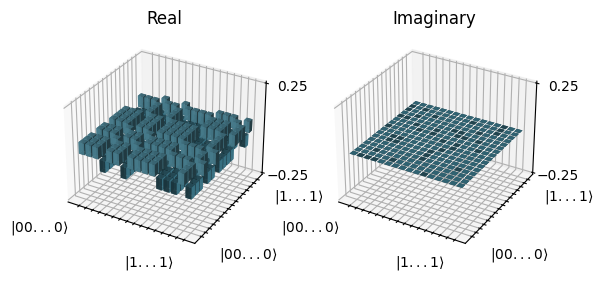

In [5]:
compiler = DensityMatrixCompiler()
state = compiler.compile(circuit)

# trace out the emitter qubit
state.partial_trace(keep=(0, 1, 2, 3), dims=5 * [2])

fig, ax = graphiq.visualizers.density_matrix_bars(state.rep_data.data)
plt.show()

We can compare this to the expected state, a four-photon linear cluster state, by creating it as a `networkx` graph and converting it to the corresponding density matrix. 

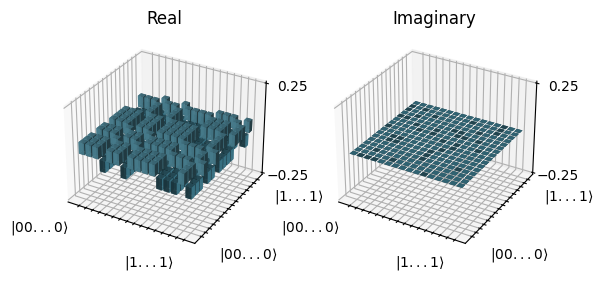

In [7]:
graph = nx.Graph([(1, 2), (2, 3), (3, 4)])
dm = DensityMatrix.from_graph(graph).data
ideal = QuantumState(dm, rep_type="dm")
fig, ax = graphiq.visualizers.density_matrix_bars(state.rep_data.data)
plt.show()